# About the dataset 

# Context 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


# Setting up the environment

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
import  seaborn as sns # for plots
import matplotlib.pyplot as plt # for visualizations and plots

# this eliminates the requirement to use plt.show() after every plot
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split # spliting training and testing data
from sklearn.preprocessing import MinMaxScaler # data normalization with sklearn
from sklearn.preprocessing import StandardScaler # data standardization with  sklearn
from sklearn.ensemble import RandomForestClassifier # model
from sklearn.linear_model import LogisticRegression # model
from sklearn.neighbors import KNeighborsClassifier # model
from sklearn.metrics import classification_report, confusion_matrix # to evaluate the model

# Import Dataset 

In [3]:
df = pd.read_csv("diabetes.csv")

# Getting info about the dataset

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for NaN values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks like there is no null value !!

# Data Cleaning

In the above stats we can see that there are people with 0 BP (dead person?), 0 skin thickness (skeleton?) and 0 Glucose (how do they even survive?).

So basically these values are null, so let's convert them into NaN !!

In [8]:
df["Glucose"] = df["Glucose"].apply(lambda x: np.nan if x == 0 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: np.nan if x == 0 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: np.nan if x == 0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: np.nan if x == 0 else x)
df["BMI"] = df["BMI"].apply(lambda x: np.nan if x == 0 else x)

Now again check for NaN values...

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

SkinThickness and Insulin have maximum values as null !!

# Exploratory Data Analysis 

<AxesSubplot:xlabel='Outcome', ylabel='count'>

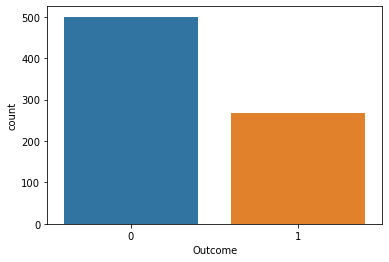

In [10]:
sns.countplot(x="Outcome", data=df)

In [11]:
Out0=len(df[df.Outcome==1])
Out1=len(df[df.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0

(65.10416666666667, 34.895833333333336)

Here we can see 65.1% of the people in this dataset doesn't have Diabetes and 34.9% does.

# Pregnencies vs Outcome

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

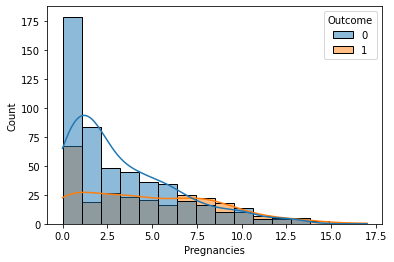

In [12]:
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True)

# Blood Pressure vs Outcome

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

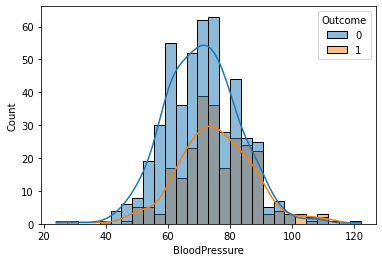

In [13]:
sns.histplot(x="BloodPressure", hue="Outcome", data=df, kde=True)

Here we can see that the BP levels of diabetic people is a little high.

# Glucose vs Outcome

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

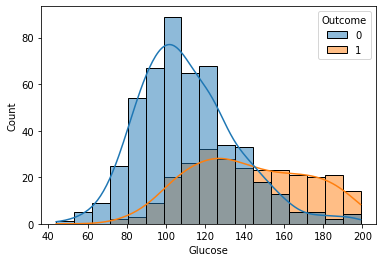

In [14]:
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True)

Here we can see that the glucose levels of diabetic people is generally high.

# Skin Thickness vs Outcome

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

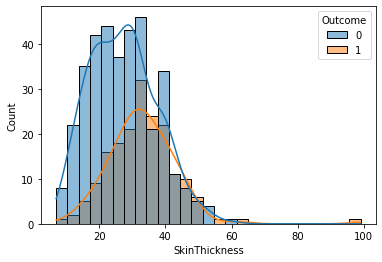

In [15]:
sns.histplot(x="SkinThickness", hue="Outcome", data=df, kde=True)

Here we can see diabetic people have a little more thick skin.

# Insulin vs Outcome

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

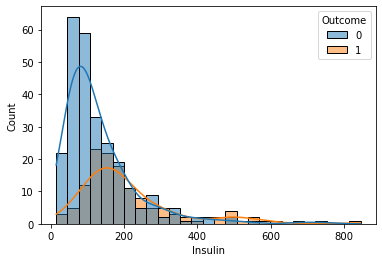

In [16]:
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True)

# Age vs Outcome

<AxesSubplot:xlabel='Age', ylabel='Count'>

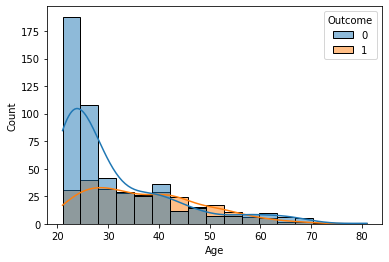

In [17]:
sns.histplot(x="Age", hue="Outcome", data=df, kde=True)

We can see that old people are more diabetic.

# BMI vs Outcome

<AxesSubplot:xlabel='BMI', ylabel='Count'>

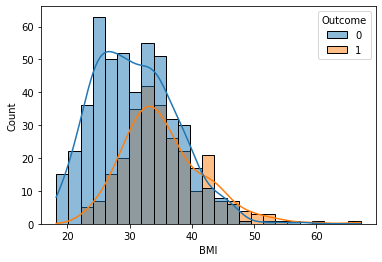

In [18]:
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True)

Diabetic people have higher BMI.

# DiabetesPedigreeFunction vs Outcome

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

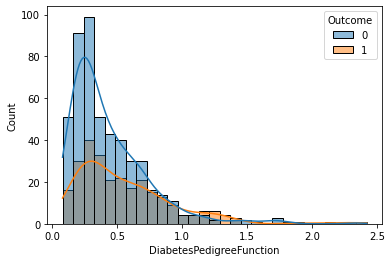

In [19]:
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=df, kde=True)

<AxesSubplot:>

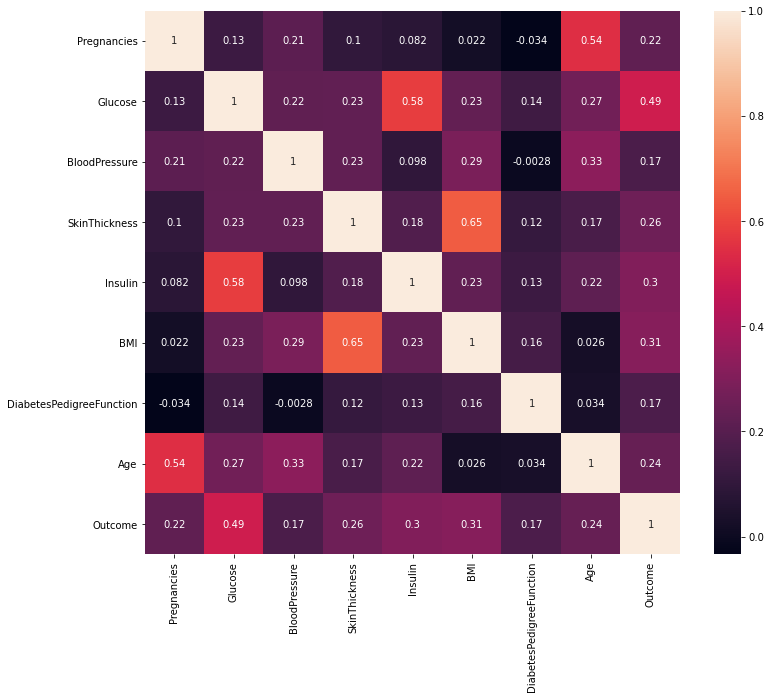

In [20]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)

Outcome is highliy correlated with Glucose.

# Cleaning the dataset

Let's get rid of Nan !!

Percentages of NaNs

In [21]:
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

We can see that the Insulin column has nearly 50% of NaN values. Therefore, it would be wise to drop the column entirely!

In [22]:
df.drop(columns=["Insulin"], inplace=True)

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

For highly skewed values we'll impute the column with median else mean.

In [25]:
# Highly skewed
df["BMI"].replace(to_replace=np.nan,value=df["BMI"].median(), inplace=True)
df["Pregnancies"].replace(to_replace=np.nan,value=df["Pregnancies"].median(), inplace=True)

# Normal
df["Glucose"].replace(to_replace=np.nan,value=df["Glucose"].mean(), inplace=True)
df["BloodPressure"].replace(to_replace=np.nan,value=df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].replace(to_replace=np.nan,value=df["SkinThickness"].mean(), inplace=True)

# Modeling

# Split the data

In [26]:
X = df[df.columns[:-1]]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Normalize the data

In [27]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Models

# Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)
y_pred = lr.predict(X_test_norm)

# Random Forest Classifier

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_norm, y_train)
rf_pred = rf_model.predict(X_test_norm)

# K Neighbors Classifier

In [30]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_norm, y_train)
knn_pred = knn_model.predict(X_test_norm)

# Evaluation

For the evaluation we will be mainly looking at Precision & Recall values. This is because in the dataset there are very less points for diabetic people, because of which even if a model predicts 0 for everyone, it can be very accurate!

In [31]:
print("Logistic Regression: \n", classification_report(y_test, y_pred)) 
print("\nRandom Forest Classifier: \n", classification_report(y_test, rf_pred)) 
print("\nK Neighbors Classifier: \n", classification_report(y_test, knn_pred)) 

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154


Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154


K Neighbors Classifier: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72      

# Confusion Matrix

## Logistic Regression

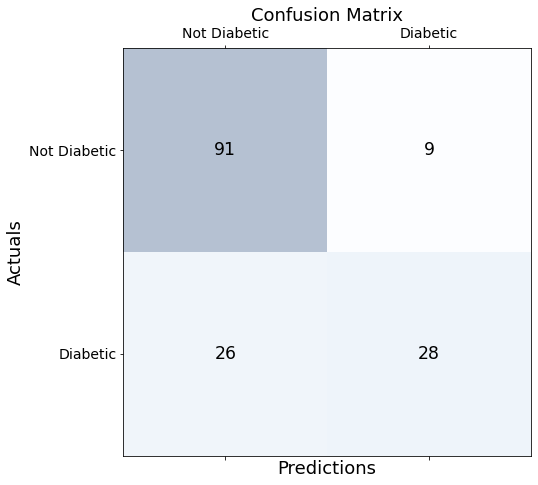

In [32]:
labels = ["Not Diabetic", "Diabetic"]
cm  = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.xticks(range(2), labels, fontsize=14)
plt.yticks(range(2), labels, fontsize=14)
plt.show()

## Random Forest

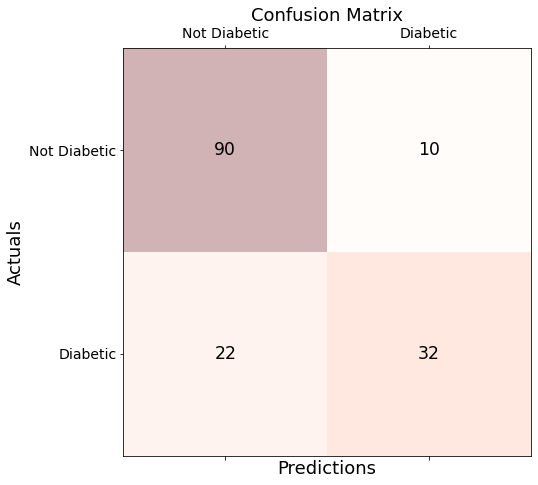

In [33]:
labels = ["Not Diabetic", "Diabetic"]
cm  = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.xticks(range(2), labels, fontsize=14)
plt.yticks(range(2), labels, fontsize=14)
plt.show()

## K Neighbors Classifier

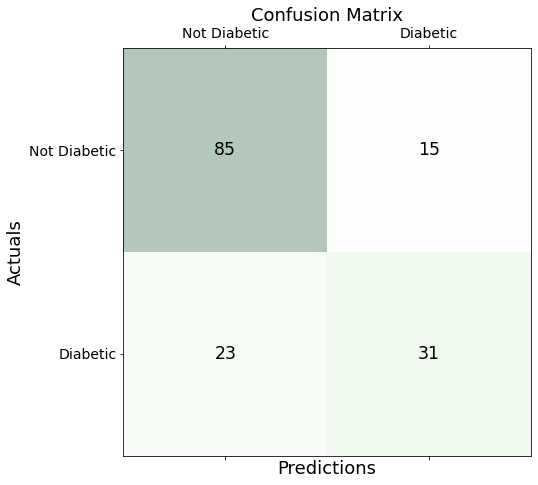

In [34]:
labels = ["Not Diabetic", "Diabetic"]
cm  = confusion_matrix(y_test, knn_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

plt.xticks(range(2), labels, fontsize=14)
plt.yticks(range(2), labels, fontsize=14)
plt.show()

We can conclude that Random Forest Classifier model works better in this case.